Dataset Used- AWCustomers.csv

Step 1: Load the Dataset

In [1]:
import pandas as pd

df=pd.read_csv("AWCustomers.csv")

In [ ]:
Step 2,3: Examine Attributes and Select Relevant Features
Step 4: Determine Data Value Types

In [10]:
selected_columns= [
    'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
    'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
    'YearlyIncome', 'BirthDate'  # We will later convert this to Age
]

# Option 1: Create a new DataFrame with only selected 
df_selected=df[selected_columns].copy()
print(df_selected.columns)

#STEP4
# Step 1: Use --.dtypes to check Python/Pandas data types
print(df_selected.dtypes)
df_selected.info()


Index(['Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'BirthDate'],
      dtype='object')
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
BirthDate               object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Education             18361 non-null  object
 1   Occupation            18361 non-null  object
 2   Gender                18361 non-null  object
 3   MaritalStatus         18361 non-null  object
 4   HomeOwnerFlag         18361 non-null  int64 
 5   NumberCa

Part II: Data Preprocessing and Transformation

Step 1: Handle Null Values

In [12]:
# Check for nulls
print(df_selected.isnull().sum())

# Example: Fill nulls
df_selected['Education'].fillna(df_selected['Education'].mode()[0], inplace=True)
df_selected['Occupation'].fillna(df_selected['Occupation'].mode()[0], inplace=True)
df_selected['YearlyIncome'].fillna(df_selected['YearlyIncome'].mean(), inplace=True)
# Drop rows if too many nulls (optional)
df_selected.dropna(inplace=True)

Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
BirthDate               0
dtype: int64


C:\Users\Raiza Duggal\AppData\Local\Temp\ipykernel_7960\1188784767.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['Education'].fillna(df_selected['Education'].mode()[0], inplace=True)
C:\Users\Raiza Duggal\AppData\Local\Temp\ipykernel_7960\1188784767.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

Step 2: Convert BirthDate to Age

In [13]:
from datetime import datetime

df_selected['Age'] = pd.to_datetime(df_selected['BirthDate'])
df_selected['Age'] = datetime.now().year - df_selected['Age'].dt.year
df_selected.drop('BirthDate', axis=1, inplace=True)


Step 3: Normalize Continuous Values (e.g., Min-Max)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_selected[['YearlyIncome', 'Age']] = scaler.fit_transform(df_selected[['YearlyIncome', 'Age']])


Step 4: Discretization (Binning) – Optional on Age or Income

In [19]:
# Binning Age into 5 categories
df_selected['Age_Bin'] = pd.cut(df_selected['Age'], bins=5, labels=False)

# Example: Discretize YearlyIncome into 3 bins
df_selected['Income_Bin'] = pd.qcut(df_selected['YearlyIncome'], q=3, labels=False)


Step 5: Standardization (Z-Score) – Alternative to Normalization

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_selected[['YearlyIncome', 'Age']] = scaler.fit_transform(df_selected[['YearlyIncome', 'Age']])


Step 6: One-Hot Encoding for Nominal Attributes

In [21]:
df_encoded = pd.get_dummies(df_selected, columns=[
    'Education', 'Occupation', 'Gender', 'MaritalStatus'
])


Part III: Proximity / Correlation Analysis

Step 1: Ensure Attributes are on the Same Scale

Already done via standardization.
Categorical features are one-hot encoded.

In [23]:
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Get two records
obj1 = df_encoded.iloc[0].values.astype(int)
obj2 = df_encoded.iloc[1].values.astype(int)

# ✅ Jaccard Similarity for binary vectors (e.g., one-hot encoded)
jaccard = jaccard_score(obj1, obj2, average='macro')  # You can try 'weighted' or 'samples' too

# ✅ Simple Matching Coefficient
matching = np.sum(obj1 == obj2) / len(obj1)

# ✅ Cosine Similarity (works for numeric or binary vectors)
cosine = cosine_similarity([obj1], [obj2])[0][0]

print("Simple Matching:", matching)
print("Jaccard Similarity:", jaccard)
print("Cosine Similarity:", cosine)


Simple Matching: 0.7272727272727273
Jaccard Similarity: 0.30833333333333335
Cosine Similarity: 0.8125


Step 3: Correlation Between Commute Distance and Yearly Income

Correlation matrix:
                  CommuteDistance  YearlyIncome
CommuteDistance         1.000000     -0.001082
YearlyIncome           -0.001082      1.000000


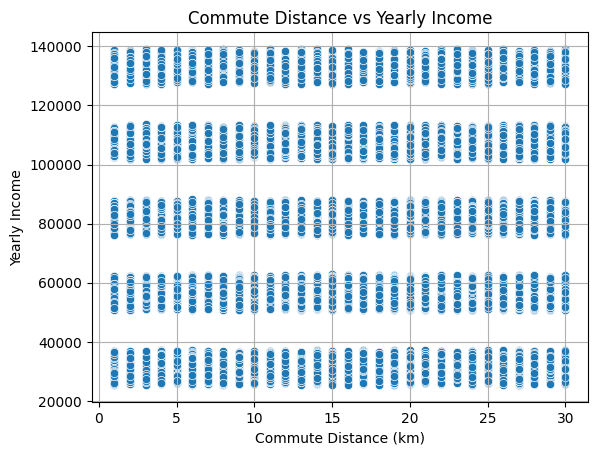

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- STEP 1: Load your dataset ---
df = pd.read_csv("AWCustomers.csv")  # Replace with actual filename

# --- STEP 2: Simulate CommuteDistance if it doesn't exist ---
if 'CommuteDistance' not in df.columns:
    # Generate random commute distances between 1 km and 30 km
    df['CommuteDistance'] = np.random.randint(1, 31, size=len(df))

# --- STEP 3: Handle missing values in YearlyIncome if any ---
if df['YearlyIncome'].isnull().sum() > 0:
    df['YearlyIncome'].fillna(df['YearlyIncome'].mean(), inplace=True)

# --- STEP 4: Correlation between CommuteDistance and YearlyIncome ---
correlation = df[['CommuteDistance', 'YearlyIncome']].corr(method='pearson')
print("Correlation matrix:\n", correlation)

# --- STEP 5: Visualization ---
sns.scatterplot(x='CommuteDistance', y='YearlyIncome', data=df)
plt.title('Commute Distance vs Yearly Income')
plt.xlabel('Commute Distance (km)')
plt.ylabel('Yearly Income')
plt.grid(True)
plt.show()


TO SEE THE FINAL RESULT!!!

In [31]:
print(df_selected)

             Education      Occupation Gender MaritalStatus  HomeOwnerFlag  \
0            Bachelors        Clerical      M             M              1   
1      Partial College        Clerical      M             M              1   
2            Bachelors        Clerical      F             S              0   
3      Partial College  Skilled Manual      M             M              1   
4      Partial College  Skilled Manual      M             S              1   
...                ...             ...    ...           ...            ...   
18356  Graduate Degree  Skilled Manual      F             M              0   
18357        Bachelors  Skilled Manual      F             S              0   
18358  Partial College  Skilled Manual      F             S              0   
18359      High School        Clerical      F             S              0   
18360  Graduate Degree    Professional      F             M              1   

       NumberCarsOwned  NumberChildrenAtHome  TotalChildren  Ye